# Pneumonia Detector

## Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Preparing Data

The data didn't have the same number of pneumonia and normal images so randomly copiny and pasting the image in the dataset to make the number of images comparable in both the categories

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('chest_xray/train/',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 7766 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('chest_xray/test/',
                                            target_size = (256,256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


## Building CNN Model

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

## Fitting the model

In [6]:
fit = model.fit(x = training_set, validation_data = test_set, epochs = 5)

2022-04-14 20:11:58.671934: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5
243/243 [==============================] - 1062s 4s/step - loss: 0.3765 - accuracy: 0.8264 - val_loss: 0.2343 - val_accuracy: 0.9054
Epoch 2/5
243/243 [==============================] - 1626s 7s/step - loss: 0.2297 - accuracy: 0.9141 - val_loss: 0.2287 - val_accuracy: 0.9006
Epoch 3/5
243/243 [==============================] - 1312s 5s/step - loss: 0.1810 - accuracy: 0.9306 - val_loss: 0.1648 - val_accuracy: 0.9439
Epoch 4/5
243/243 [==============================] - 1469s 6s/step - loss: 0.1885 - accuracy: 0.9305 - val_loss: 0.2131 - val_accuracy: 0.9231
Epoch 5/5
243/243 [==============================] - 1145s 5s/step - loss: 0.1685 - accuracy: 0.9408 - val_loss: 0.1737 - val_accuracy: 0.9439


## Plotting Graphs of the model

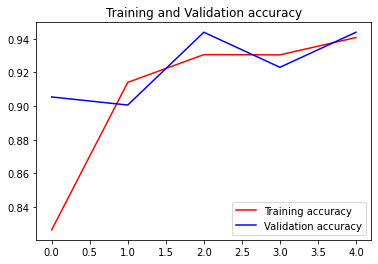

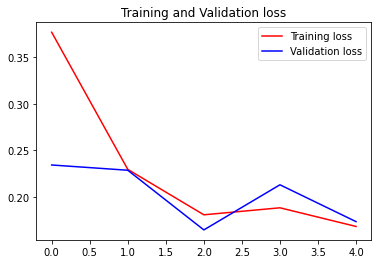

In [7]:
# Plotting loss vs accuracy

acc = fit.history["accuracy"]
val_acc = fit.history["val_accuracy"]
loss = fit.history["loss"]
val_loss = fit.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")

plt.legend()
plt.show()

## Making Single Prediction

In [8]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

The prediction is:  Normal


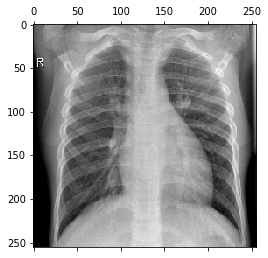

In [9]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('chest_xray/test/NORMAL/NORMAL-472699-0001.jpeg', target_size = (256, 256))
plt.matshow(test_image)
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Pneumonia'
else:
  prediction = 'Normal'

print("The prediction is: ",prediction)

The prediction is:  Pneumonia


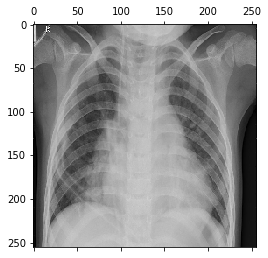

In [10]:
test_image = image.load_img('chest_xray/test/PNEUMONIA/BACTERIA-40699-0001.jpeg', target_size = (256, 256))
plt.matshow(test_image)
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Pneumonia'
else:
  prediction = 'Normal'

print("The prediction is: ",prediction)

## Saving the model

In [11]:
import joblib
joblib.dump(model,'pneumonia_model.pkl')

2022-04-14 22:02:14.108159: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://40e6a941-833d-497e-8b60-a21de89574e3/assets


['pneumonia_model.pkl']

## Making y_pred for the test range

In [12]:
import os
path_nor = 'chest_xray/test/NORMAL/'
path_pne = 'chest_xray/test/PNEUMONIA/'
normal = []
pneumonia = []

for i in os.scandir(path_nor):
    if i is not None:
        normal.append(i.path)

for i in os.scandir(path_pne):
    if i is not None:
        pneumonia.append(i.path)

In [22]:
normal_count = []
for i in normal:
    test_image = image.load_img(i, target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    normal_count.append(result[0][0])


print(normal_count)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9240252, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [23]:
normal_count = np.array(normal_count)
normal_count = normal_count.round()
u, c_normal = np.unique(normal_count, return_counts=True)
print(u)
print(c_normal)

[0. 1.]
[213  21]


In [24]:
pneumonia_count = []
for i in pneumonia:
    test_image = image.load_img(i, target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pneumonia_count.append(result[0][0])


print(pneumonia_count)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 9.137805e-25, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 4.0366997e-23, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [28]:
pneumonia_count = np.array(pneumonia_count)
u, c_pne = np.unique(pneumonia_count, return_counts=True)
print(u)
print(c_pne)

[0. 1.]
[ 21 369]


In [30]:
confusion_matrix_array = [c_normal,c_pne]
print(confusion_matrix_array)

[array([213,  21]), array([ 21, 369])]


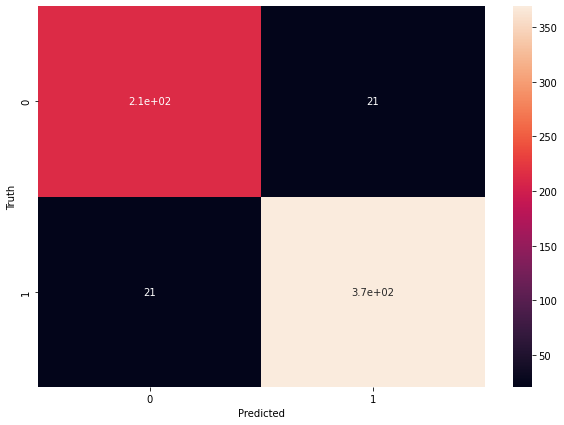

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix_array, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Thus, from the confusion matrix we can figure out:

True Positive: 213

True Neagtive: 369

False Positive: 21

False Negative: 21

Therefore, 

### Recall of the Model : 0.91025641

### Precision of the Model : 0.91025641

### F1 Score of the Model : 0.91025641